# App to do random DALL-E-@ Generation

Another consideration is to execute prompts that pick the (formerly totally) random words from the days events, or some other theme that could make use os a tool/agent

In [1]:
# Set up the API Keys and such
import os 
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())

OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')
SERPAPI_API_KEY = os.getenv('SERPAPI_API_KEY')
PINECONE_API_KEY = os.getenv('PINECONE_API_KEY')
PINECONE_API_KEY = os.getenv('PINECONE_API_KEY')
HNSWLIB_NO_NATIVE = os.getenv('PINECONE_API_KEY')

In [2]:
import openai
import pandas as pd
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate

In [3]:
# Didn't wind up using this, but leaving for now
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, 
    )
    return response.choices[0].message["content"]

In [4]:
# Initialize the LLM
llm = OpenAI(temperature=0.9)

In [5]:
# Create the prompt and execute it
text = f"""
Return 3 random words separated by spaces without comma delimiters.
Each word will have no relation to each other.
"""

random_words = llm(text)
random_words += " in bauhaus style"

print(random_words)


Nominalize Acclaimed Impassable in bauhaus style


In [6]:
# Use the DALL-E API to create a single image from the random words
image_response = openai.Image.create(
    prompt=random_words,
    n=1,
    size="512x512",
)

In [7]:
#print(image_response)
#type(image_response)

In [8]:
#print(image_response.data)

In [9]:
url = image_response['data'][0]['url']

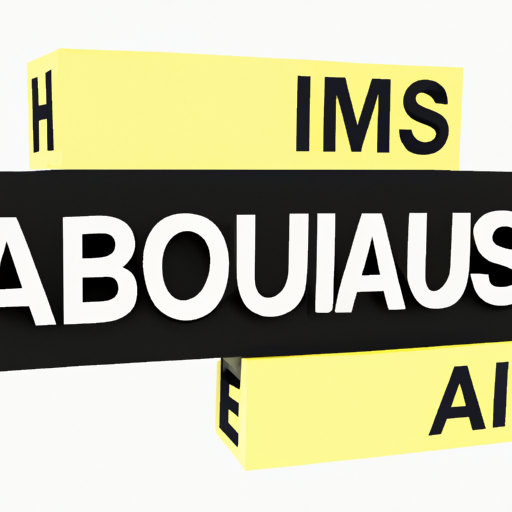

In [10]:
# Display the image from the url
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

# Use requests to get the image data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Get the content of the response
    img_data = response.content
    
    # Create a PIL image from the byte data
    img = Image.open(BytesIO(img_data))
    
    # Display the image
    display(img)
else:
    print(f'Unable to retrieve the image. HTTP status code: {response.status_code}')
